# Calculating features

In [1]:
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

import numpy as np
import pandas as pd
from os.path import join
import os

Using TensorFlow backend.


In [2]:
regions = ['borde_rural', 'borde_soacha', 'mixco_1_and_ebenezer', 'mixco_3']

In [44]:
region = 'borde_soacha'
train_dir = join('..', '..', 'data', region, 'roofs_train')
test_dir = join('..', '..', 'data', region, 'roofs_test')
materials = {'healthy_metal':0, 'irregular_metal':1, 'concrete_cement':2, 'incomplete':3, 'other':4}

Use a pretrained network to compute features from the images, which are later classified. Import the model from the Kerase library and remove the top layer by setting `include_top=False`. The last layer is pooled such that we get outputs of size 1x2048 instead of 7x7x2048. The pooling method `'max'` is chosen empirically.

In [45]:
model = ResNet50(weights='imagenet', include_top=False, pooling='max')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
___________________________________________________________________________________________

## 1. Calculate features on the training data

The preprocessed data is stored in such a way, that every region has their own folder, that contains a subfolder defined as `train_dir` above. This folder again is subdivided by material. Images carry their `id` as filename.

Traverse all images in their corresponding folders which indicate the material and use `model.predict()` to get the features.

In [46]:
def calculate_features_train(train_dir):
    
    # Initialize a dataframe for the features    
    columns = ['id', 'features', 'label']
    df_features = pd.DataFrame(columns=columns)

    # Walk through all images
    for material in materials.keys():
        material_fp = join(train_dir, material)
        for root, dirs, files in os.walk(material_fp):
            for file in files:
                img_fp = join(material_fp, file)
                label = materials[material]
                id = file.split('.')[0]
                print(id, "labeled as", material, ":", label)

                # Pad if size is too small, preprocess
                img = image.load_img(img_fp, target_size=(224, 224))
                img_data = image.img_to_array(img)
                img_data = np.expand_dims(img_data, axis=0)
                img_data = preprocess_input(img_data)

                # Compute features 
                resnet50_feature = model.predict(img_data)
                resnet50_feature_np = np.array(resnet50_feature).flatten()

                df_features = df_features.append({'id': id ,
                                                  'features': resnet50_feature_np,
                                                  'label': label}, ignore_index=True)
    
    return df_features

The results are stored in a dataframe as shown below and saved to disk as a pickle file.

In [47]:
features_train = calculate_features_train(train_dir)

7a1c5468 labeled as healthy_metal : 0
7a1c6340 labeled as healthy_metal : 0
7a1c65c0 labeled as healthy_metal : 0
7a1c75a6 labeled as healthy_metal : 0
7a1c7a2e labeled as healthy_metal : 0
7a1c7c04 labeled as healthy_metal : 0
7a1c7e70 labeled as healthy_metal : 0
7a1c81ea labeled as healthy_metal : 0
7a1c8262 labeled as healthy_metal : 0
7a1c8b04 labeled as healthy_metal : 0
7a1c932e labeled as healthy_metal : 0
7a1c94fa labeled as healthy_metal : 0
7a1c9a18 labeled as healthy_metal : 0
7a1ca184 labeled as healthy_metal : 0
7a1ca5c6 labeled as healthy_metal : 0
7a1ca878 labeled as healthy_metal : 0
7a1cb8d6 labeled as healthy_metal : 0
7a1cc48e labeled as healthy_metal : 0
7a1cc61e labeled as healthy_metal : 0
7a1cc696 labeled as healthy_metal : 0
7a1cc984 labeled as healthy_metal : 0
7a1ccace labeled as healthy_metal : 0
7a1ccce0 labeled as healthy_metal : 0
7a1ccd44 labeled as healthy_metal : 0
7a1cce16 labeled as healthy_metal : 0
7a1ccf9c labeled as healthy_metal : 0
7a1cd4ec lab

7a1f1ef0 labeled as healthy_metal : 0
7a1f2512 labeled as healthy_metal : 0
7a1f259e labeled as healthy_metal : 0
7a1f28a0 labeled as healthy_metal : 0
7a1f2a08 labeled as healthy_metal : 0
7a1f31b0 labeled as healthy_metal : 0
7a1f35ca labeled as healthy_metal : 0
7a1f3a98 labeled as healthy_metal : 0
7a1f3d0e labeled as healthy_metal : 0
7a1f4628 labeled as healthy_metal : 0
7a1f5046 labeled as healthy_metal : 0
7a1f58ac labeled as healthy_metal : 0
7a1f597e labeled as healthy_metal : 0
7a1f5c58 labeled as healthy_metal : 0
7a1f5d8e labeled as healthy_metal : 0
7a1f5f96 labeled as healthy_metal : 0
7a1f6004 labeled as healthy_metal : 0
7a1f61a8 labeled as healthy_metal : 0
7a1f6824 labeled as healthy_metal : 0
7a1f6a9a labeled as healthy_metal : 0
7a1f6afe labeled as healthy_metal : 0
7a1f6f72 labeled as healthy_metal : 0
7a1f7c74 labeled as healthy_metal : 0
7a1f7db4 labeled as healthy_metal : 0
7a1f7f4e labeled as healthy_metal : 0
7a1f7fbc labeled as healthy_metal : 0
7a1f8516 lab

7a21fd28 labeled as healthy_metal : 0
7a21ff30 labeled as healthy_metal : 0
7a220192 labeled as healthy_metal : 0
7a220200 labeled as healthy_metal : 0
7a2204da labeled as healthy_metal : 0
7a2205ac labeled as healthy_metal : 0
7a22061a labeled as healthy_metal : 0
7a2209c6 labeled as healthy_metal : 0
7a220d0e labeled as healthy_metal : 0
7a220f84 labeled as healthy_metal : 0
7a22118c labeled as healthy_metal : 0
7a2212c2 labeled as healthy_metal : 0
7a221326 labeled as healthy_metal : 0
7a2215a6 labeled as healthy_metal : 0
7a221740 labeled as healthy_metal : 0
7a221a24 labeled as healthy_metal : 0
7a221b00 labeled as healthy_metal : 0
7a221de4 labeled as healthy_metal : 0
7a221f88 labeled as healthy_metal : 0
7a2223a2 labeled as healthy_metal : 0
7a22246a labeled as healthy_metal : 0
7a2226ea labeled as healthy_metal : 0
7a222c6c labeled as healthy_metal : 0
7a222f46 labeled as healthy_metal : 0
7a223284 labeled as healthy_metal : 0
7a2232f2 labeled as healthy_metal : 0
7a2234fa lab

7a24d73c labeled as healthy_metal : 0
7a24dd7c labeled as healthy_metal : 0
7a24dee4 labeled as healthy_metal : 0
7a24e088 labeled as healthy_metal : 0
7a24e434 labeled as healthy_metal : 0
7a24eca4 labeled as healthy_metal : 0
7a24ed12 labeled as healthy_metal : 0
7a24ed8a labeled as healthy_metal : 0
7a24ef9c labeled as healthy_metal : 0
7a24f03c labeled as healthy_metal : 0
7a24f186 labeled as healthy_metal : 0
7a24f262 labeled as healthy_metal : 0
7a24f7b2 labeled as healthy_metal : 0
7a24f8a2 labeled as healthy_metal : 0
7a24fd16 labeled as healthy_metal : 0
7a24ff3c labeled as healthy_metal : 0
7a2502b6 labeled as healthy_metal : 0
7a25069e labeled as healthy_metal : 0
7a250a68 labeled as healthy_metal : 0
7a250dce labeled as healthy_metal : 0
7a250e3c labeled as healthy_metal : 0
7a250eaa labeled as healthy_metal : 0
7a25135a labeled as healthy_metal : 0
7a2513c8 labeled as healthy_metal : 0
7a2514a4 labeled as healthy_metal : 0
7a251724 labeled as healthy_metal : 0
7a2518d2 lab

7a2793f0 labeled as healthy_metal : 0
7a27945e labeled as healthy_metal : 0
7a2799c2 labeled as healthy_metal : 0
7a279b70 labeled as healthy_metal : 0
7a279bde labeled as healthy_metal : 0
7a279ecc labeled as healthy_metal : 0
7a27a0de labeled as healthy_metal : 0
7a27a14c labeled as healthy_metal : 0
7a27a3c2 labeled as healthy_metal : 0
7a27a944 labeled as healthy_metal : 0
7a27ab56 labeled as healthy_metal : 0
7a27ae3a labeled as healthy_metal : 0
7a27aeb2 labeled as healthy_metal : 0
7a27b204 labeled as healthy_metal : 0
7a27b34e labeled as healthy_metal : 0
7a27b542 labeled as healthy_metal : 0
7a27b5ec labeled as healthy_metal : 0
7a27bc9a labeled as healthy_metal : 0
7a27c460 labeled as healthy_metal : 0
7a27c4d8 labeled as healthy_metal : 0
7a27c618 labeled as healthy_metal : 0
7a27c9d8 labeled as healthy_metal : 0
7a27ce7e labeled as healthy_metal : 0
7a27d090 labeled as healthy_metal : 0
7a27da18 labeled as healthy_metal : 0
7a27ddd8 labeled as healthy_metal : 0
7a27df4a lab

7a2adccc labeled as healthy_metal : 0
7a2ade20 labeled as healthy_metal : 0
7a2adfd8 labeled as healthy_metal : 0
7a2ae046 labeled as healthy_metal : 0
7a2ae0b4 labeled as healthy_metal : 0
7a2ae384 labeled as healthy_metal : 0
7a2ae7c6 labeled as healthy_metal : 0
7a2af054 labeled as healthy_metal : 0
7a2afe14 labeled as healthy_metal : 0
7a2b0f58 labeled as healthy_metal : 0
7a2b14f8 labeled as healthy_metal : 0
7a2b15a2 labeled as healthy_metal : 0
7a2b1656 labeled as healthy_metal : 0
7a2b1908 labeled as healthy_metal : 0
7a2b1ae8 labeled as healthy_metal : 0
7a2b201a labeled as healthy_metal : 0
7a2b2196 labeled as healthy_metal : 0
7a2b245c labeled as healthy_metal : 0
7a2b25b0 labeled as healthy_metal : 0
7a2b27cc labeled as healthy_metal : 0
7a2b2f88 labeled as healthy_metal : 0
7a2b3456 labeled as healthy_metal : 0
7a2b367c labeled as healthy_metal : 0
7a2b388e labeled as healthy_metal : 0
7a2b432e labeled as healthy_metal : 0
7a2b51de labeled as healthy_metal : 0
7a2b5292 lab

7a2de23c labeled as healthy_metal : 0
7a2de30e labeled as healthy_metal : 0
7a2de89a labeled as healthy_metal : 0
7a2deab6 labeled as healthy_metal : 0
7a2deb92 labeled as healthy_metal : 0
7a2dee80 labeled as healthy_metal : 0
7a2df1dc labeled as healthy_metal : 0
7a2df59c labeled as healthy_metal : 0
7a2dfbd2 labeled as healthy_metal : 0
7a2dfde4 labeled as healthy_metal : 0
7a2dff24 labeled as healthy_metal : 0
7a2dff92 labeled as healthy_metal : 0
7a2e076c labeled as healthy_metal : 0
7a2e083e labeled as healthy_metal : 0
7a2e0988 labeled as healthy_metal : 0
7a2e0ac8 labeled as healthy_metal : 0
7a2e0b90 labeled as healthy_metal : 0
7a2e0da2 labeled as healthy_metal : 0
7a2e0e10 labeled as healthy_metal : 0
7a2e0f46 labeled as healthy_metal : 0
7a2e10f4 labeled as healthy_metal : 0
7a2e12a2 labeled as healthy_metal : 0
7a2e1586 labeled as healthy_metal : 0
7a2e16c6 labeled as healthy_metal : 0
7a2e1806 labeled as healthy_metal : 0
7a2e1874 labeled as healthy_metal : 0
7a2e1ba8 lab

7a3071fa labeled as healthy_metal : 0
7a3077b8 labeled as healthy_metal : 0
7a307858 labeled as healthy_metal : 0
7a307a7e labeled as healthy_metal : 0
7a307cb8 labeled as healthy_metal : 0
7a307ec0 labeled as healthy_metal : 0
7a3080e6 labeled as healthy_metal : 0
7a308550 labeled as healthy_metal : 0
7a308aa0 labeled as healthy_metal : 0
7a308da2 labeled as healthy_metal : 0
7a308e88 labeled as healthy_metal : 0
7a30909a labeled as healthy_metal : 0
7a3094c8 labeled as healthy_metal : 0
7a3097b6 labeled as healthy_metal : 0
7a309e64 labeled as healthy_metal : 0
7a30a526 labeled as healthy_metal : 0
7a30a80a labeled as healthy_metal : 0
7a30a8e6 labeled as healthy_metal : 0
7a30a9ae labeled as healthy_metal : 0
7a30aa8a labeled as healthy_metal : 0
7a30abca labeled as healthy_metal : 0
7a30af8a labeled as healthy_metal : 0
7a30b200 labeled as healthy_metal : 0
7a30b26e labeled as healthy_metal : 0
7a30b2dc labeled as healthy_metal : 0
7a30b89a labeled as healthy_metal : 0
7a30be62 lab

7a32cbda labeled as healthy_metal : 0
7a32ccac labeled as healthy_metal : 0
7a32d4f4 labeled as healthy_metal : 0
7a32d558 labeled as healthy_metal : 0
7a32d7ce labeled as healthy_metal : 0
7a32dbde labeled as healthy_metal : 0
7a32dd82 labeled as healthy_metal : 0
7a32e12e labeled as healthy_metal : 0
7a32e19c labeled as healthy_metal : 0
7a32e2d2 labeled as healthy_metal : 0
7a32e336 labeled as healthy_metal : 0
7a32e412 labeled as healthy_metal : 0
7a32e476 labeled as healthy_metal : 0
7a32e5b6 labeled as healthy_metal : 0
7a32e61a labeled as healthy_metal : 0
7a32e746 labeled as healthy_metal : 0
7a32f0b0 labeled as healthy_metal : 0
7a32f2c2 labeled as healthy_metal : 0
7a32f330 labeled as healthy_metal : 0
7a32f402 labeled as healthy_metal : 0
7a32f4d4 labeled as healthy_metal : 0
7a32fa24 labeled as healthy_metal : 0
7a32fc36 labeled as healthy_metal : 0
7a33060e labeled as healthy_metal : 0
7a33074e labeled as healthy_metal : 0
7a330fe6 labeled as healthy_metal : 0
7a33118a lab

7a354d1a labeled as healthy_metal : 0
7a354d88 labeled as healthy_metal : 0
7a354df6 labeled as healthy_metal : 0
7a354f36 labeled as healthy_metal : 0
7a35556c labeled as healthy_metal : 0
7a355986 labeled as healthy_metal : 0
7a355b34 labeled as healthy_metal : 0
7a355c06 labeled as healthy_metal : 0
7a356110 labeled as healthy_metal : 0
7a356174 labeled as healthy_metal : 0
7a3563ea labeled as healthy_metal : 0
7a35673c labeled as healthy_metal : 0
7a3569bc labeled as healthy_metal : 0
7a356b60 labeled as healthy_metal : 0
7a356bc4 labeled as healthy_metal : 0
7a356f16 labeled as healthy_metal : 0
7a35725e labeled as healthy_metal : 0
7a357542 labeled as healthy_metal : 0
7a3575a6 labeled as healthy_metal : 0
7a357c4a labeled as healthy_metal : 0
7a357cae labeled as healthy_metal : 0
7a357eb6 labeled as healthy_metal : 0
7a358064 labeled as healthy_metal : 0
7a35833e labeled as healthy_metal : 0
7a3583ac labeled as healthy_metal : 0
7a35841a labeled as healthy_metal : 0
7a358fa0 lab

KeyboardInterrupt: 

In [ ]:
features_train.head()

In [ ]:
import pickle
from os import makedirs
from os.path import exists

pickle_path = join('..', '..', 'pickles')
if not exists(pickle_path):
    makedirs(pickle_path)

with open(join(pickle_path, 'resnet50_features_' + region + '_train.pkl' ), 'wb') as f:
    pickle.dump(features_train, f)

### Visualize the features

Reduce the dimensionality to 2D using tSNE (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)

In [36]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
%matplotlib inline

In [37]:
def plot_tSNE(features, labels=None, number_of_materials=5):
    if labels is None:
        labels = np.zeros((features.shape[0]))

    # Visualization_
    #pca_object = PCA(n_components=50)
    #pca_features = pca_object.fit_transform(features)
    tsne_features = TSNE(n_components=2).fit_transform(features)

    # define the colormap
    cmap = plt.cm.jet
    # extract all colors from the .jet map
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # create the new map
    cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

    # define the bins and normalize
    bounds = np.linspace(0, number_of_materials, number_of_materials + 1)
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
    
    print(tsne_features.shape)
    
    # Plot D-Vectors
    plt.figure()
    scat = plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels, cmap=cmap, norm=norm)
    cb = plt.colorbar(scat, spacing='proportional', ticks=bounds)

Convert features within the dataframe to a single matrix

In [38]:
feat_matrix = features_train['features'].to_numpy()
feat_matrix = np.column_stack(feat_matrix).transpose()

labels = features_train['label'].to_numpy()

(4353, 2)


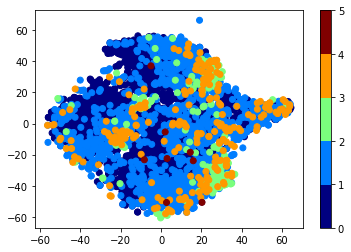

In [39]:
plot_tSNE(feat_matrix, labels)

## 2. Calculate features on the test data


This procedure is similar as for the training data, except that we do not know the labels and the folder with test images is not subdivided by material

In [ ]:
def calculate_features_test(test_dir):
    
    # Initialize a dataframe for the features    
    columns = ['id', 'features']
    df_features = pd.DataFrame(columns=columns)

    # Walk through all images
    for root, dirs, files in os.walk(test_dir):
        for file in files:
            img_fp = join(root, file)
            id = file.split('.')[0]
            print("Calculate features for", id)

            # Pad if size is too small, preprocess
            img = image.load_img(img_fp, target_size=(224, 224))
            img_data = image.img_to_array(img)
            img_data = np.expand_dims(img_data, axis=0)
            img_data = preprocess_input(img_data)

            # Compute features 
            resnet50_feature = model.predict(img_data)
            resnet50_feature_np = np.array(resnet50_feature).flatten()

            df_features = df_features.append({'id': id ,
                                              'features': resnet50_feature_np},
                                             ignore_index=True)

    return df_features

In [ ]:
features_test = calculate_features_test(test_dir)

In [ ]:
features_test.head()

In [ ]:
with open(join(pickle_path, 'resnet50_features_' + region + '_test.pkl' ), 'wb') as f:
    pickle.dump(features_test, f)